# Premier League Club Investment Analysis for an Investment Company(EDA)

**Domain: Sports**

**Context:**
    
A renowned investment firm usually invest in top-tier sports teams that have potential. The dataset in their possession comprises crucial information about all the clubs that have participated in premier league (assume that it has the data for all clubs). It includes data on the number of goals scored, the number of times they have finished in the top two positions and other relevant details.

**Data:**
Premier League Final Data.csv- : The data set contains information on all the clubs so far participated in all the premier league tournaments.

**Data Dictionary:**

* Club: Name of the football club
* Matches: Number of matches the club has played in the Premier League
* Wins: Number of matches won by the club in the Premier League
* Loss: Number of matches lost by the club in the Premier League
* Draws: Number of matches drawn by the club in the Premier League
* Clean Sheets: Number of matches in which the club has prevented the opposing side from scoring
* Team Launch: Year in which the club was founded
* Winners: Number of times the club has won the Premier League
* Runners-up: Number of times the club has finished as runners-up in the Premier League
* lastplayed_pl: Year in which the team last played in the Premier League

**Project Objective**

The management of the firm aims to invest in one of the top-performing club in the English Premier League. To aid in their decision-making process, the analytics department has been tasked with creating a comprehensive report on the performance of various clubs. However, some of the more established clubs have already been owned by the competitors. As a result, the firm wishes to identify the clubs they can approach and potentially invest to ensure a successful and profitable deal.


In [280]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [281]:
#loading the dataset
df=pd.read_csv('/Users/jensontmathew/Downloads/Premier_League_Final_Data_batch2.csv')

In [282]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [283]:
df.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


In [284]:
df.shape

(40, 11)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


# Cleaning the dataset

In [286]:
df['Club']=df['Club'].str.replace('\d+','')

/var/folders/pm/rykkh9p96rz7t0x93h8qkl9r0000gn/T/ipykernel_2041/1024696855.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Club']=df['Club'].str.replace('\d+','')


In [287]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [288]:
df.isna().sum()

Club               0
Matches Played     0
Win                0
Loss               0
Drawn              0
Goals              0
Clean Sheets       0
TeamLaunch         0
Winners           15
Runners-up        18
lastplayed_pl      0
dtype: int64

In [289]:
df['Winners'].value_counts()

0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: Winners, dtype: int64

Here we can observe that the total match conducted is same as the total winning count . So we replace the null values to '0'

In [290]:
df['Winners'].fillna(0,inplace=True)

In [291]:
df.isna().sum()

Club               0
Matches Played     0
Win                0
Loss               0
Drawn              0
Goals              0
Clean Sheets       0
TeamLaunch         0
Winners            0
Runners-up        18
lastplayed_pl      0
dtype: int64

In [292]:
df['Runners-up'].value_counts()

0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: Runners-up, dtype: int64

Similar to Winners column we replace the null column to 0 and also change the '-' to 0.

In [293]:
df['Runners-up'].replace('-',0,inplace=True)
df['Runners-up'].fillna(0,inplace=True)
df['Runners-up']=df['Runners-up'].astype('int64')

Now we will look the TeamLaunch column

In [294]:
df['TeamLaunch'].value_counts()

1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1895           1
1881           1
1904           1
1932           1
1912           1
1863           1
1877           1
1885           1
1867           1
1889           1
1894           1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
April 1898     1
Name: TeamLaunch, dtype: int64

Here we can see some values consist of month combined with year

In [295]:
#converting the coloumn to datetime format
df['TeamLaunch']=pd.to_datetime(df['TeamLaunch'],errors='coerce')
#converting th column to YYYY format
df['TeamLaunch']=df['TeamLaunch'].dt.strftime('%Y')

Now we convert the last played column to year only format

In [296]:
df['lastplayed_pl']=pd.to_datetime(df['lastplayed_pl'],format='%b-%y',errors='coerce').dt.year

Now we have done the data cleaning and now we look into analysing the data

# Data Analysis

In [297]:
df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up,lastplayed_pl
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.750000,2018.000000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458,6.876195
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.000000,2000.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.000000,2014.500000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.000000,2022.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.000000,2023.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.000000,2023.000000


The average number of matches played by each team in the tournament is 573.75, while the mean number of goals scored by all teams is 769. However, the median number of goals scored is much lower at 462, indicating that some teams have scored significantly more goals than others. 

Interestingly, the median number of wins and runners-up positions are both 0, suggesting that most teams have not won or finished as runners-up in the tournament. However, there is one team that has won the tournament a remarkable 13 times and another team that has been the runners-up 7 times. It would be interesting to find out which teams these are.

In [298]:
#Team that has won Premier League 13 times
df[df['Winners']==13]['Club']

20    Manchester United
Name: Club, dtype: object

In [299]:
#Team that is runner up 7 times
df[df['Runners-up']==7]['Club']

20    Manchester United
Name: Club, dtype: object

Manchester United has won Premier league 13 times and have been runner-up 7 times.

Text(0.5, 1.0, 'Histogram of Matches Played')

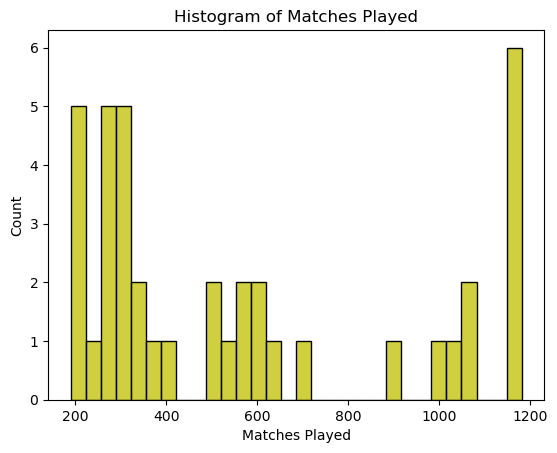

In [300]:
#Data Visualisation
#We can look at the matches played by each club

sns.histplot(df['Matches Played'],color='y',bins=30)
plt.title('Histogram of Matches Played')

Here we observe that majority of the team has playes less than 400 and some teams played matches greater thean 900 which are the well established clubs.
As per our projects requirements it is worth noting that some of the more established clubs have already been owned by the competitors. Therefore, the client is interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League.

In [301]:
# Identify teams who have played more than 900 matches

df[df['Matches Played']>=900]['Club']

0               Arsenal
1           Aston Villa
9               Chelsea
13              Everton
18            Liverpool
19      Manchester City
20    Manchester United
22     Newcastle United
29          Southampton
33    Tottenham Hotspur
36      West Ham United
Name: Club, dtype: object

In [302]:
df[df['Matches Played']<900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
10,Coventry City,354,99,143,112,387,92,1883,0.0,0,2001
11,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023
12,Derby County,266,68,128,70,271,66,1884,0.0,0,2008


Now we filter our dataset by the Matchesplayed is less than 900

In [303]:
df=df[df['Matches Played']<900].reset_index(drop=True)

In [304]:
#checking the shape of the new dataset
df.shape

(29, 11)

We create new columns for Win Rate,Loss Rate,Drawn Rate and Clean Sheet rate because the number of matches played by every club is different.

In [305]:
df['Win Rate']=(df['Win']/df['Matches Played'])*100
df['Loss Rate']=(df['Loss']/df['Matches Played'])*100
df['Drawn Rate']=(df['Drawn']/df['Matches Played'])*100
df['Clean Sheet Rate']=(df['Clean Sheets']/df['Matches Played'])*100

In [306]:
df['Average Goals Per Match']=(df['Goals']/df['Matches Played']).round()

In [307]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Average Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Now we create a boxplot 

Text(0, 0.5, 'Rate')

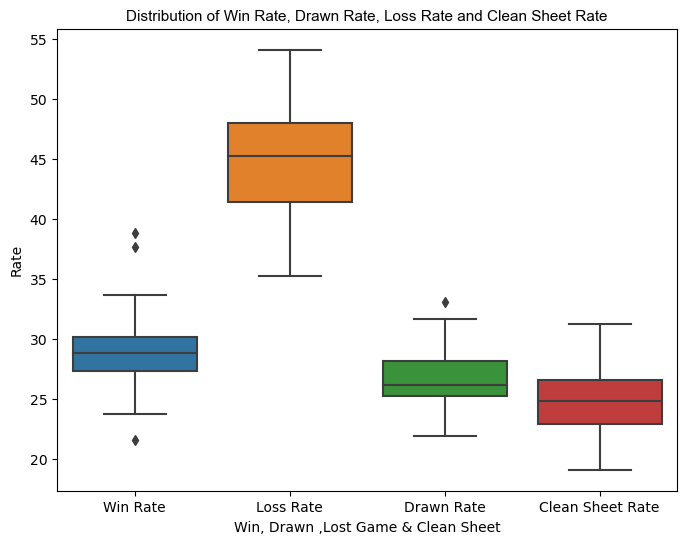

In [308]:
plt.figure(figsize=(8, 6))
sx=sns.boxplot(data=[df['Win Rate'],df['Loss Rate'],df['Drawn Rate'],df['Clean Sheet Rate']])
sx.set_xticklabels(['Win Rate','Loss Rate','Drawn Rate','Clean Sheet Rate'])
# Set the title and axis labels
plt.title('Distribution of Win Rate, Drawn Rate, Loss Rate and Clean Sheet Rate',fontname='Arial', fontsize=11)
plt.xlabel('Win, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')

#### Win Rate

We observe that there are a few outliers in the Winning Rate boxplot, which are located above the upper whisker. We conclude that these outlier clubs have shown exceptional winning rates compared to the other clubs. Let us identify them ahead.

Also let us identify the club that has least "Winning Rate"

#### Loss Rate

We can see very clearly that loss rates for these clubs are high compared to winning rate. 

#### Drawn Rate

We observe an outlier in the drawn rate boxplot, indicating that there is one clubs has a much higher drawn rate compared to others. This may not necessarily be a positive indication, as it suggests that the club may struggle to secure wins in their matches. Going further let us identify which club is this.

#### Clean Sheet Rate

We see that data for Clean Sheet rate is pretty symmetric.

In [309]:
# Win Rate further analysis
#Calculate the inter quartile range for the winning
Q1=df['Win Rate'].quantile(0.25)
Q3=df['Win Rate'].quantile(0.75)
IQR=Q3-Q1

In [310]:
#Calculate the upper boundaries for potential outliers
upper_bound=Q3+1.5*IQR

In [311]:
#identify the clubs with high win rate
df[df['Win Rate']>upper_bound]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Average Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


In [312]:
#identify the clubs with lower win rate
lower_bound=Q1-1.5*IQR
df[df['Win Rate']<lower_bound]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Average Goals Per Match
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


In [313]:
#likewise we will find the outlier for Draw Rate
Q1=df['Drawn Rate'].quantile(0.25)
Q3=df['Drawn Rate'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR

In [314]:
df[df['Drawn Rate']>upper]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Average Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


In [315]:
df['Average Goals Per Match'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Average Goals Per Match, dtype: float64

As you can see we can't infer much from this metric. Therefore we will not use it for further analysis.

In [316]:
df['Winners'].value_counts()

0.0    27
1.0     2
Name: Winners, dtype: int64

In [317]:
df['Runners-up'].value_counts()

0    28
1     1
Name: Runners-up, dtype: int64

In [318]:
#Now we will find the clubs that has been the winner and runer up in the Premier League
df[(df['Winners']==1)  |  (df['Runners-up']==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Average Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


We can infer that Blackburn Rovers has won the Premier League and has been a runner up one time. Leicester City has been runner up one time.

In [319]:
# Lets us again analyse Matches Played Column for our reduced dataframe (29 clubs).

df['Matches Played'].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

In [320]:
# Let us look at "lastplayed_pl" column
df['lastplayed_pl'].value_counts()

2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: lastplayed_pl, dtype: int64

In [321]:
#Now we will find the clubs that played in 2023
df[df['lastplayed_pl']==2023]['Club']

3                 Bournemouth
4      Brighton & Hove Albion
8              Crystal Palace
10                     Fulham
12               Leeds United
13             Leicester City
16          Nottingham Forest
27    Wolverhampton Wanderers
Name: Club, dtype: object

Giving more priority to teams that have more recent experience playing in the Premier League is ideal. When making the final decision, we will assign higher weight to teams that have played more recently, and lesser weight to those that have not played recently.

# Final Recommendation Framework

Let's create a plan to Score each team on the pre defined metric.

* Give a score of 10 if club have a relatively high experience in the Premier League above average (372)
* Give a score of 15 if club has winning rate above Q3
* Give a score of 15 if club has lossing rate below Q1
* Give a score of 10 if club drawn rate below Q1 and losing rate is below Q1
* Give a score of 10 if club has clean sheet above Q3 and winning rate is above Q3
* Give a score of 15 if club has won premier league
* Give a score of 10 if club has been a runners-up in premier league
* Give a score of 15 if club has been currently playing in premier league

In [322]:
len(df)

29

In [323]:
#we will create a column scores to the dataframe 
df['scores']=np.zeros(len(df))

In [324]:
#Calculate the upper bound of win rate
upper_bound_win_rate=df['Win Rate'].quantile(0.75)

#Calculate the lower bound of loss rate
lower_bound_loss_rate=df['Loss Rate'].quantile(0.25)

#Calculate the lower bound of drawn rate
lower_bound_drawn_rate=df['Drawn Rate'].quantile(0.25)

#Calculate the upper bound of clean sheet rate
upper_bound_clean_sheet=df['Clean Sheet Rate'].quantile(0.75)

In [325]:
df.loc[df['Matches Played'] >=372, 'scores'] +=10
df.loc[df['Win Rate']>=upper_bound_win_rate,'scores'] +=15
df.loc[df['Loss Rate']<=lower_bound_loss_rate,'scores'] +=15
df.loc[(df['Drawn Rate']<=lower_bound_drawn_rate) & (df['Loss Rate']<=lower_bound_drawn_rate),'scores'] +=10
df.loc[(df['Clean Sheet Rate']>=upper_bound_clean_sheet) & (df['Win Rate']>=upper_bound_win_rate),'scores'] +=10
df.loc[df['Winners']==1,'scores'] +=15
df.loc[df['Runners-up']==1,'scores'] +=10
df.loc[df['lastplayed_pl']==2023,'scores'] +=15

In [326]:
#Sorting the dataframe in descending order
df_sort=df.sort_values(by='scores',ascending=False)

(0.0, 100.0)

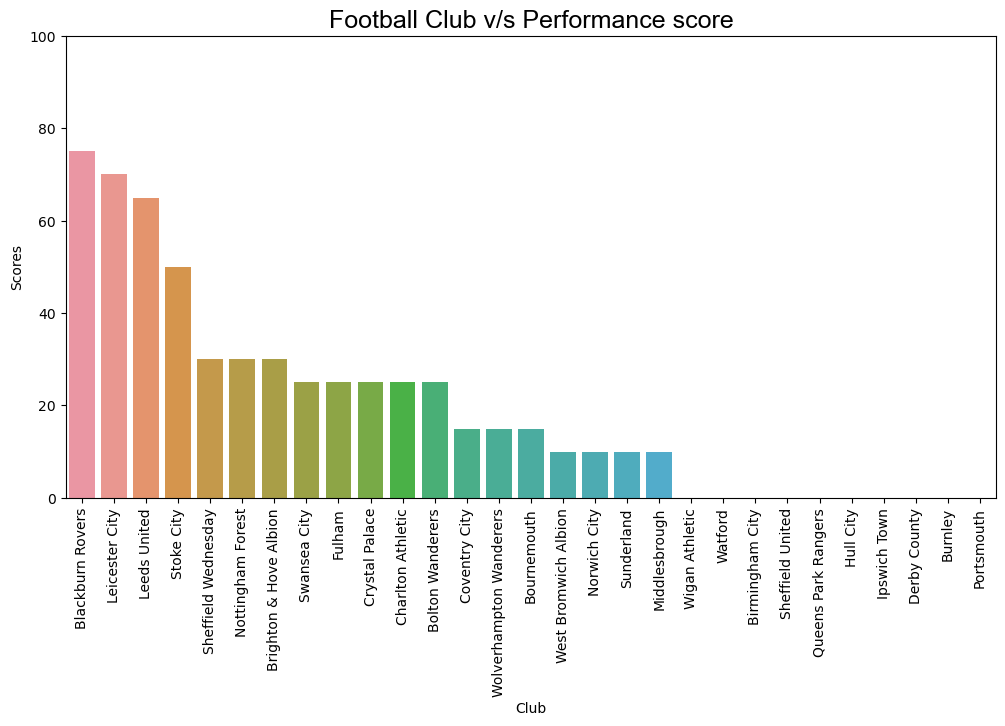

In [327]:
#Plotting the graph
plt.figure(figsize=(12,6))
sns.barplot(x=df_sort['Club'],y=df_sort['scores'])
plt.ylabel('Scores')
plt.title('Football Club v/s Performance score', fontsize=18,font='Arial')

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0,100)

Here we can see that Blackburn Rovers has a good score followed by Leicester City

Now we check if the leading clubs have played in the recent years.

In [328]:
df_sort=df[(df['lastplayed_pl']==2023) | (df['lastplayed_pl']==2022)].sort_values(by='scores',ascending=False)

In [329]:
df_sort.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Win Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Average Goals Per Match,scores
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0,70.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0,65.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,30.0
16,Nottingham Forest,227,66,94,67,253,52,1865,0.0,0,2023,29.074890,41.409692,29.515419,22.907489,1.0,30.0
8,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023,28.759398,45.300752,25.939850,25.000000,1.0,25.0


(0.0, 100.0)

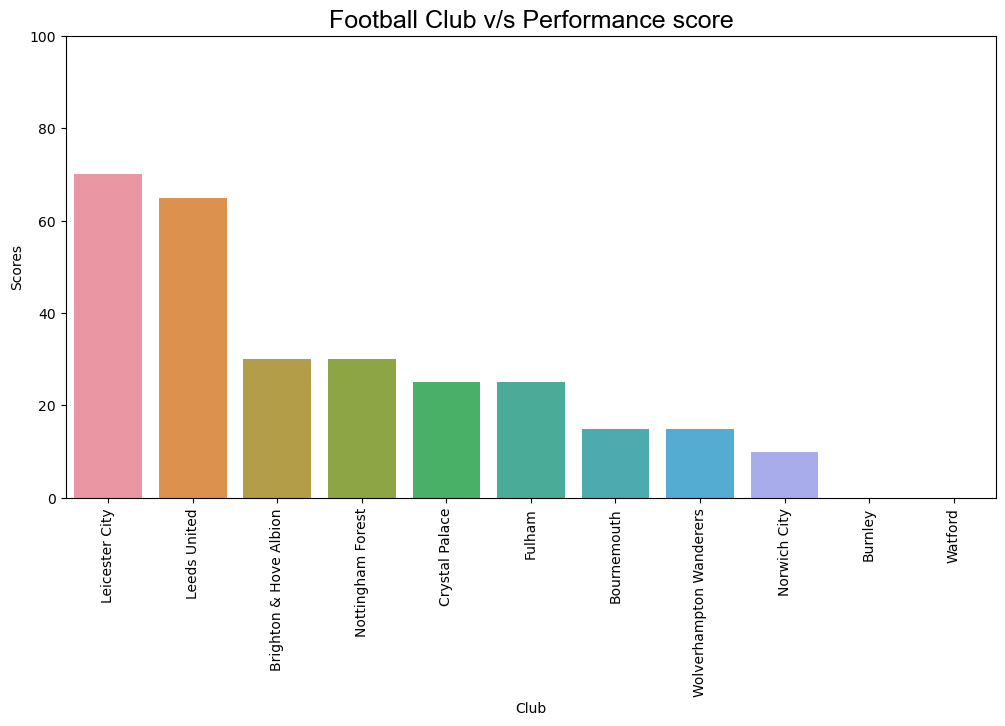

In [330]:
#Plotting the graph
plt.figure(figsize=(12,6))
sns.barplot(x=df_sort['Club'],y=df_sort['scores'])
plt.ylabel('Scores')
plt.title('Football Club v/s Performance score', fontsize=18,font='Arial')

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0,100)

We can find that Blackburn Rovers has be removed from the list .

We can check when Blackburn Rovers had played last

In [332]:
df[df['Club']=='Blackburn Rovers']['lastplayed_pl']

1    2012
Name: lastplayed_pl, dtype: int64

Blackburn Rovers last played in the tournament in 2012, which was quite some time ago. Given this information, we recommend that stakeholders consider investing in Leicester City instead. We believe that Leicester City's recent form and performance make them a better choice for investment.

To support our claim, we will conduct further secondary research to provide additional evidence of Leicester City's current form and potential for success

According to our research, Blackburn Rovers were relegated to the Championship league in 2012 i.e., league below Premier League and later to League One in 2017 i.e., league below Championship league. However, they were promoted back to the Championship in 2018 and have since finished in the middle of the table in recent years. Given their inconsistent performance and lack of presence in the Premier League since 2012, it would be inappropriate to recommend this club for investment.

On the other hand, Leicester City, the 2016 Premier League champions, have consistently finished in the top 10 in recent years. They placed 5th in both the 2019-2020 and 2020-2021 seasons and finished 8th in 2021-2022. With sufficient financial backing, Leicester City has the potential to achieve even greater success in the near future. Therefore, it would be reasonable to recommend Leicester City to our clients.

*Source 1: https://www.transfermarkt.co.in/blackburn-rovers/platzierungen/verein/164*

*Source 2: https://www.transfermarkt.co.in/leicester-city/platzierungen/verein/1003*

### We recommend investing in Leicester City based on our analysis